### Lectura del dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Lectura
ruta = '../semana_5/turistas_cartagena_data_clean.csv'
data = pd.read_csv(ruta, index_col=0)

In [5]:
print(data.shape)
data.head()

(494, 10)


,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
0,1982-12,126958.0,27.6,195.4,0.0,252889.0,3076.77,0.0,74.0,88.0
1,1983-01,136932.0,27.6,248.9,0.0,268933.0,3231.50,1.0,103.0,98.4
2,1983-02,108694.0,30.7,61.9,1.0,113428.0,3478.34,0.0,205.0,72.0
3,1983-03,124879.0,31.6,3.3,0.0,275006.0,3925.80,0.0,122.0,63.9
4,1983-04,115268.0,31.9,41.1,0.0,346627.0,3400.98,0.0,169.0,89.9


### Análisis Exploratorio

La idea es usar herramientas de estadística y visualización para:
- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente

Llevaremos a cabo estas fases:
1. Análisis de cada variable de manera individual.
2. Análisis univariado: relación de cada variable predictora con la varible a predecir.
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir.

### Análisis de cada variable de manera individual
Nos permite entender las características generales de cada variable de nuestro set de datos.

In [6]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Fecha                                      494 non-null    object 
 1   Número de Visitantes                       494 non-null    float64
 2   Temperatura Media (°C)                     494 non-null    float64
 3   Precipitación (mm)                         494 non-null    float64
 4   Eventos Especiales                         494 non-null    float64
 5   Costo Promedio de Alojamiento (COP)        494 non-null    float64
 6   Tasa de Cambio (USD/COP)                   494 non-null    float64
 7   Promociones de Turismo                     494 non-null    float64
 8   Cantidad de Vuelos y Cruceros Disponibles  494 non-null    float64
 9   Ocupación Hotelera (%)                     494 non-null    float64
dtypes: float64(9), object(1)
memory

No hay varibles categóricas a analizar.

Miremos ahora las varibles numéricas:

In [8]:
# Podemos extraer algunas variables estadísticas descriptivas básicas.
data.describe()

,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,79242.596936,28.427733,152.577733,0.188259,291448.101215,3226.988725,0.301619,177.026316,74.265992
std,42500.215496,2.040875,89.587008,0.391315,111576.987264,432.249308,0.459426,70.325737,14.265861
min,5769.000000,25.000000,1.500000,0.000000,100781.000000,2500.200000,0.000000,50.000000,50.000000
25%,42174.750000,26.600000,70.275000,0.000000,196025.250000,2902.385000,0.000000,113.000000,61.900000
50%,81793.000000,28.400000,155.000000,0.000000,287292.500000,3213.990000,0.000000,181.000000,73.100000
75%,116788.000000,30.200000,230.950000,0.000000,383675.250000,3585.485000,1.000000,235.000000,87.075000
max,149572.000000,32.000000,299.400000,1.000000,499845.000000,3996.730000,1.000000,299.000000,100.000000


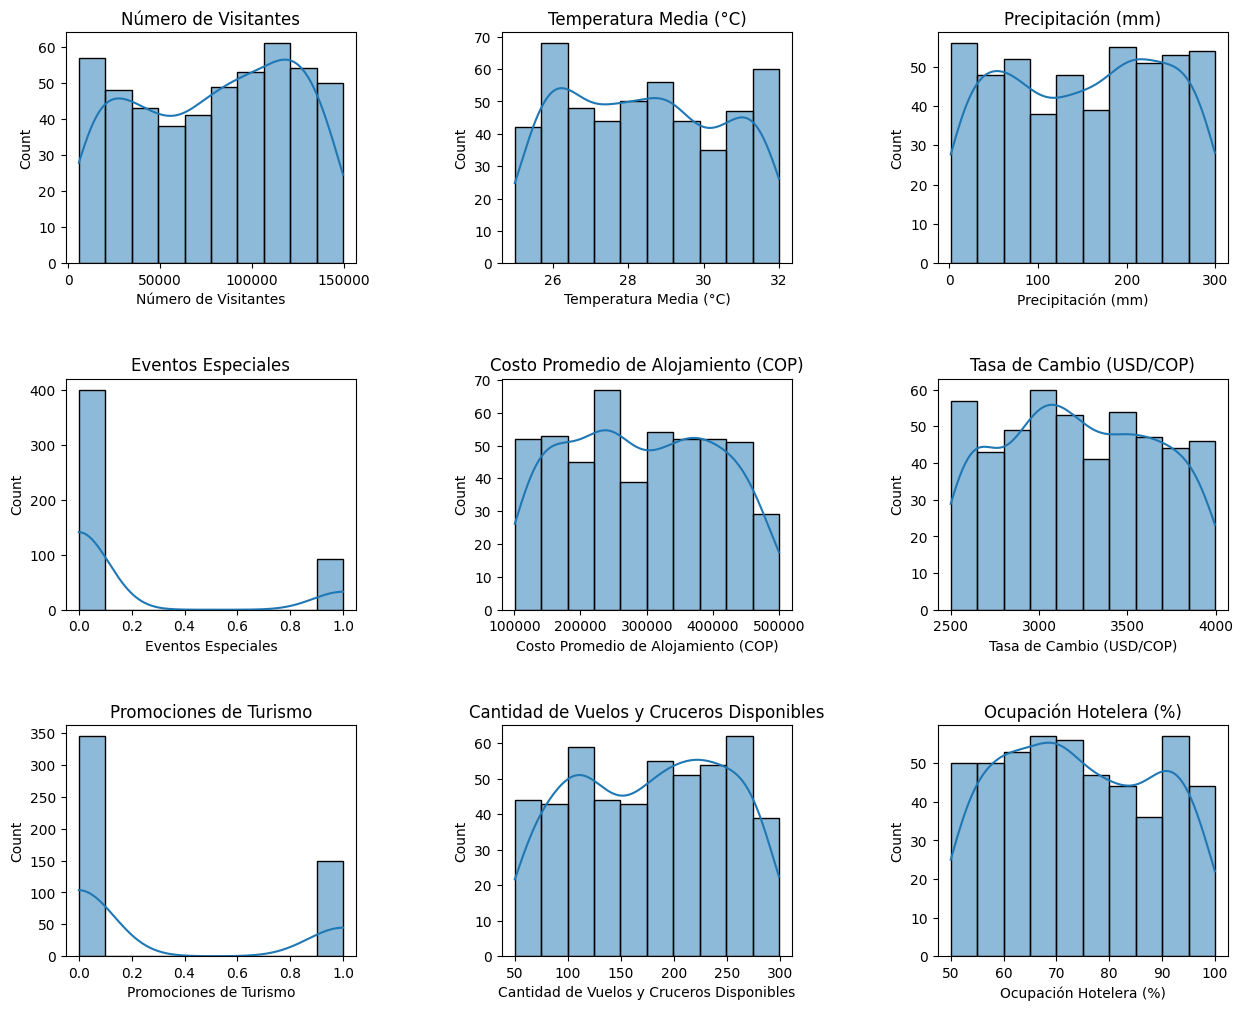

In [17]:
# Muchas veces es más fácil graficar dichas variables

# Dibujar histogramas
cols_num = data.select_dtypes(exclude=['object']).columns # Selecciona las columnas no object

# Crear subgráficos en una cuadrícula 3x3
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12)) 
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajustar el espacio entre gráficos

# Aplanar la matriz de ejes para un acceso más fácil
ax = ax.flatten()

# Graficar cada columna numérica en su correspondiente subgráfico
for i, col in enumerate(cols_num):  # Asegurar que no se pasen de 9
    sns.histplot(x=col, data=data, ax=ax[i], kde=True)
    ax[i].set_title(col)